In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [16]:
# Ruta del archivo Excel
ruta_archivo = '/content/consolidado_motores.xlsx'

# Cargar el archivo Excel en un DataFrame
consolidado = pd.read_excel(ruta_archivo, sheet_name='Consolidado')

In [17]:
# Filtrar el DataFrame para obtener solo los motores con voltaje entre 550 y 585
consolidado2 = consolidado[(consolidado['SEG_VOLT'] == "BAJO VOLTAJE 2(550-585)")]

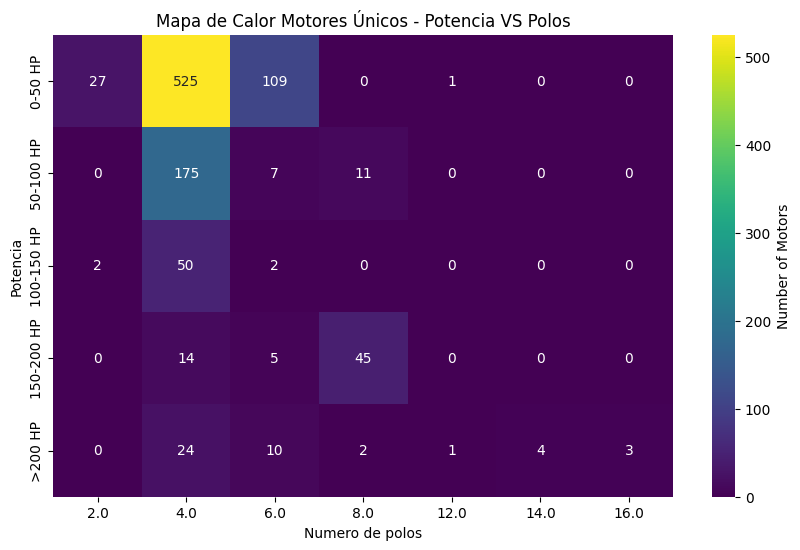

In [21]:
# Create bins for power ranges
bins = [0, 50, 100, 150, 200, float('inf')]  # Adjust bins as needed
labels = ['0-50 HP', '50-100 HP', '100-150 HP', '150-200 HP', '>200 HP']
consolidado2.loc[:, 'Power Range'] = pd.cut(consolidado2['POTENCIA (HP)'], bins=bins, labels=labels)


# Create a pivot table to count motors by power range and poles
pivot_table = consolidado2.groupby(['Power Range', 'Polos'], observed=False).size().unstack()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Number of Motors'})
plt.title('Mapa de Calor Motores Únicos - Potencia VS Polos')
plt.xlabel('Numero de polos')
plt.ylabel('Potencia')
plt.show()

SELECCIÓN DE SEGMENTO CRITICO: MOTORES OBJETIVOS

In [24]:
motores_objetivos = consolidado2[
    (consolidado2['POTENCIA (HP)'] <= 100) &
    (consolidado2['Polos'] == 4)
]

In [25]:
print(f"Total de motores objetivos : {len(motores_objetivos)}")

Total de motores objetivos : 700
